Modelos de Regresion

1. Regresion Lineal

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA

RegLinDataIPSA = pd.read_csv('Clean_BD_IPSA_1940.csv')
RegLinDataAmarillo = pd.read_csv('Clean_HISTORICO_SUERTES_AMARILLOS.csv')
RegLinDataAzul = pd.read_csv('Clean_HISTORICO_SUERTES_AZULES.csv')

In [130]:
RegLinDataIPSA.head()

,Unnamed: 0,Id,NOME,FAZ,TAL,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,0,11,AMAIME SILCA,81291,40,0.8,8.3,12.3,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,1,12,AMAIME SILCA,81291,41,0.8,6.3,11.2,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,2,13,AMAIME SILCA,81291,41,0.6,7.9,12.2,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,3,15,AMAIME SILCA,81291,43,0.8,6.6,13.1,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,4,16,AMAIME SILCA,81291,43,0.6,8.1,12.2,2,7.9,2.1,14.0,3,202003,151,68,3,4.3


In [133]:
RegLinDataAmarillo.head()

,Unnamed: 0,Período,Hacienda,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Producto,Dosis Madurante,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cerca de,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,NITO_XTEND,Vinaza,Codigo Estacion,Temp. Media 0-3,Temp. Media Ciclo,Temp Max Ciclo,Temp Min Ciclo,Humedad Rel Media 0-3,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo,DS_indicator,Mes Siembra,Ano Siembra,Mes Ult.Corte,Ano Ult.Corte
0,0,202202,80101,0,11.0,0,0,0.240154,0.025522,0,2,0,0.363034,0,2.0,0,0.0,0.171666,0.452304,0.391922,0.128912,0.559966,0.346809,0.336637,0.0,0.547281,0.592623,0.614063,0.345338,0.545445,0.409114,0.012876,0.604680,0.612073,0.672628,0.870218,0.009854,0,0,0,0,0.0,263501.46,43,243.0,1388.0,456.0,178.0,361.0,393.0,0.0,0.002925,0.0,93660.0,0,22.718,22.763,33.5,15.1,83.165,81.756,14.8,22.763,419.966,422.141,510.8,1523.1,420.8,1744.2,True,11,2017,11,2022
1,1,202202,80102,0,11.0,2,1,0.202308,0.020882,0,2,0,0.356111,0,2.0,0,0.0,0.176988,0.553564,0.488989,0.132370,0.557692,0.422730,0.418309,0.0,0.541479,0.594983,0.609035,0.427340,0.503003,0.437553,0.052374,0.538827,0.568900,0.657750,0.876905,0.014405,0,0,0,0,0.0,161373.60,50,212.0,1100.0,363.0,168.0,321.0,248.0,0.0,0.003070,0.0,78900.0,0,22.734,22.763,33.5,15.1,83.297,81.713,14.8,22.763,423.232,423.395,468.1,1422.3,421.7,1716.2,True,4,2019,4,2022
2,2,202202,80102,0,11.0,3,2,0.017692,0.020882,2,5,2,0.366948,0,2.0,0,0.0,0.014452,0.516871,0.443093,0.011426,0.589540,0.417248,0.400691,0.0,0.570392,0.633899,0.642500,0.408508,0.453781,0.434599,0.000000,0.610667,0.610667,0.689046,0.883233,0.011379,0,0,0,0,0.0,13203.00,37,284.0,1517.0,483.0,182.0,418.0,434.0,0.0,0.003082,0.0,6900.0,0,22.670,22.763,33.5,15.1,82.978,81.721,14.8,22.763,420.229,422.446,505.4,1530.9,423.4,1765.5,True,7,2016,7,2022
3,3,202202,80105,1,11.0,6,0,0.147077,0.081206,3,7,3,0.363937,0,2.0,0,0.0,0.110351,0.474754,0.410354,0.088428,0.597534,0.388448,0.376119,0.0,0.576109,0.635510,0.644441,0.379467,0.491704,0.428819,0.003460,0.605620,0.607607,0.691019,0.890087,0.010170,0,0,0,0,0.0,61000.20,131,83.0,977.0,338.0,181.0,272.0,186.0,0.0,0.003530,0.0,57360.0,2,23.042,23.023,34.7,14.9,81.681,80.691,14.1,23.023,441.676,449.711,377.3,1077.3,488.7,2016.4,True,12,2013,12,2022
4,4,202202,80113,1,11.0,7,2,0.167231,0.063805,0,2,0,0.360024,0,2.0,0,0.0,0.149148,0.564334,0.493084,0.118380,0.591854,0.457353,0.447651,0.0,0.568623,0.615837,0.636065,0.450044,0.539369,0.423165,0.101370,0.641833,0.700087,0.677526,0.890598,0.012129,0,0,0,0,0.0,64930.74,135,83.0,977.0,338.0,196.0,273.0,170.0,0.0,0.003002,0.0,65220.0,2,23.042,23.012,34.7,14.9,81.769,80.743,14.1,23.012,441.991,449.852,378.9,1077.2,488.2,1999.4,True,5,2019,5,2022


In [134]:
RegLinDataAzul.head()

,Unnamed: 0,Período,Hacienda,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,Edad Ult Cos,Destino 1=Semilla,Cod. T.Cultivo,Producto,Dosis Madurante,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cerca de,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,DS_indicator,Mes Siembra,Ano Siembra,Mes Ult.Corte,Ano Ult.Corte
0,0,201701,80493,0,51.0,0,0,0.092308,0.027742,0,5,0,0.163832,0,1.0,0,0.20,0.053524,0.401841,0.343444,0.065538,0.744507,0.394555,0.423073,0.375578,0.525511,0.747728,0.735105,0.104987,0.092770,0.524960,0.354430,0.027511,0.042477,0.156308,0.814905,0.591361,0.013299,0,0,0,0,0.0,0.0,0,258.0,1038.0,0.0,454.0,102.0,482.0,0.0,0.001238,False,8,2010,1,2017
1,1,201701,81284,1,81.0,1,1,0.022308,0.164582,0,5,0,0.142473,0,1.0,1,0.00,0.010010,0.310977,0.305629,0.011217,0.681351,0.279437,0.344553,0.177949,0.525511,0.697989,0.683025,0.097203,0.076435,0.525767,0.232068,0.178084,0.030294,0.141763,0.787869,0.571945,0.358974,1,1,1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002658,False,1,2011,1,2017
2,2,201701,80203,1,31.0,2,2,0.126769,0.148387,1,4,1,0.157565,0,1.0,0,0.22,0.105742,0.578059,0.513704,0.110641,0.636196,0.485010,0.540751,0.329968,0.511054,0.648717,0.649775,0.090852,0.120078,0.481560,0.257384,0.232486,0.038832,0.182525,0.730373,0.572572,0.010250,0,0,2,0,0.0,48513.6,107,246.0,1002.0,106.0,326.0,113.0,457.0,0.0,0.001572,True,10,2011,1,2017
3,3,201701,81380,1,82.0,3,3,0.016154,0.429032,2,2,2,0.125208,0,1.0,1,0.00,0.010572,0.453537,0.507203,0.010295,0.592104,0.354159,0.496906,0.177949,0.525511,0.612880,0.594865,0.086411,0.112762,0.547032,0.282700,0.010849,0.028273,0.102601,0.705636,0.560731,0.314194,1,1,3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001934,False,3,2014,1,2017
4,4,201701,80298,2,31.0,4,4,0.069692,0.109677,3,3,3,0.147461,0,1.0,1,0.00,0.037700,0.374885,0.355976,0.032373,0.522115,0.258136,0.307523,0.374439,0.525511,0.555217,0.560199,0.080326,0.073568,0.445548,0.400844,0.045877,0.012242,0.052300,0.671531,0.533773,0.345349,1,1,4,0,0.0,0.0,0,138.0,991.0,264.0,255.0,188.0,284.0,0.0,0.001698,True,1,2013,1,2017


Base de datos IPSA

In [194]:
#BASE DE DATOS IPSA

X_rl = RegLinDataIPSA.drop(columns=["TCH","Unnamed: 0", "Id", "NOME","TAL", "sacarosa"])
y_sacarosa_rl = RegLinDataIPSA['sacarosa']
y_TCH_rl = RegLinDataIPSA['TCH']

In [195]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(X_rl, y_sacarosa_rl, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(X_rl, y_TCH_rl, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [196]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.6961809657167379
R^2: 0.1983973468814605

Modelo para estimar el TCH:
RMSE: 22.849349262782045
R^2: 0.07522901191601272


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Base de datos HISTORICOS (Amarillo)

In [188]:
#BASE DE DATOS HISTORICO AMARILLOS

X_rl_Am = RegLinDataAmarillo.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora"])
y_sacarosa_rl_Am = RegLinDataAmarillo['%Sac.Caña']
y_TCH_rl_Am = RegLinDataAmarillo['TCH']

In [189]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(X_rl_Am, y_sacarosa_rl_Am, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(X_rl_Am, y_TCH_rl_Am, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [190]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.02200727939475537
R^2: 0.8704416211014283

Modelo para estimar el TCH:
RMSE: 0.046541220528735126
R^2: 0.7326956785423792


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Base de datos HISTORICO (Azul)

In [191]:
#BASE DE DATOS HISTORICO Azules

X_rl_Az = RegLinDataAzul.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora"])
y_sacarosa_rl_Az = RegLinDataAzul['%Sac.Caña']
y_TCH_rl_Az = RegLinDataAzul['TCH']

In [192]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(X_rl_Az, y_sacarosa_rl_Az, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(X_rl_Az, y_TCH_rl_Az, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [193]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.025422180658669427
R^2: 0.795909369898392

Modelo para estimar el TCH:
RMSE: 0.052232836021346964
R^2: 0.7011339112411104


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Modelos de Clasificacion

In [150]:
bd_ipsa = pd.read_csv("Clean_BD_IPSA_1940.csv")
bd_amarillos = pd.read_csv("Clean_HISTORICO_SUERTES_AMARILLOS.csv")
bd_azules = pd.read_csv("Clean_HISTORICO_SUERTES_AZULES.csv")

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
import xgboost as xgb

In [93]:
high_ipsa = bd_ipsa.drop(columns=["TCH","Unnamed: 0", "Id", "NOME","TAL", "sacarosa"])
high_ipsa.head()

,FAZ,dosismad,semsmad,edad,cortes,me,vejez,mes,periodo,lluvias,grupo_tenencia,pct_diatrea
0,81291,0.8,8.3,12.3,4,12.7,2.4,12,202012,137,3,6.2
1,81291,0.8,6.3,11.2,2,7.8,2.3,3,201903,0,3,3.5
2,81291,0.6,7.9,12.2,3,8.8,1.8,3,202003,68,3,4.3
3,81291,0.8,6.6,13.1,1,6.1,2.5,3,201903,0,3,3.5
4,81291,0.6,8.1,12.2,2,7.9,2.1,3,202003,68,3,4.3


In [94]:
tch_cont = bd_ipsa["TCH"]
tch_cont.describe()

count    1803.000000
mean      142.008319
std        25.277405
min        35.000000
25%       126.000000
50%       143.000000
75%       159.000000
max       249.000000
Name: TCH, dtype: float64

In [95]:
def ranges(x):
    if x<129:
        return 0
    elif x>249:
        return 2
    else:
        return 1

vecRanges = np.vectorize(ranges)

tch = vecRanges(tch_cont.to_numpy())

In [97]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Cargar el conjunto de datos Iris

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(high_ipsa, tch, test_size=0.2, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.7894736842105263


In [131]:
sac_cont = bd_ipsa["sacarosa"]
sac_cont.describe()

count    1803.000000
mean       12.832890
std         0.780677
min        10.700000
25%        12.300000
50%        12.800000
75%        13.400000
max        15.000000
Name: sacarosa, dtype: float64

In [129]:
def ranges(x):
    if x<10.7:
        return 0
    elif x>13.4:
        return 2
    else:
        return 1

vecRanges = np.vectorize(ranges)

sac = vecRanges(tch_cont.to_numpy())

In [151]:
# Cargar el conjunto de datos Iris

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(high_ipsa, sac, test_size=0.2, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.7894736842105263


Varianza explicada por cada componente principal:
Componente 1: 0.1691
Componente 2: 0.1493
Componente 3: 0.1083
Componente 4: 0.0874
Componente 5: 0.0847
Componente 6: 0.0835
Componente 7: 0.0747
Componente 8: 0.0730
Componente 9: 0.0587
Componente 10: 0.0452
Componente 11: 0.0384
Componente 12: 0.0276


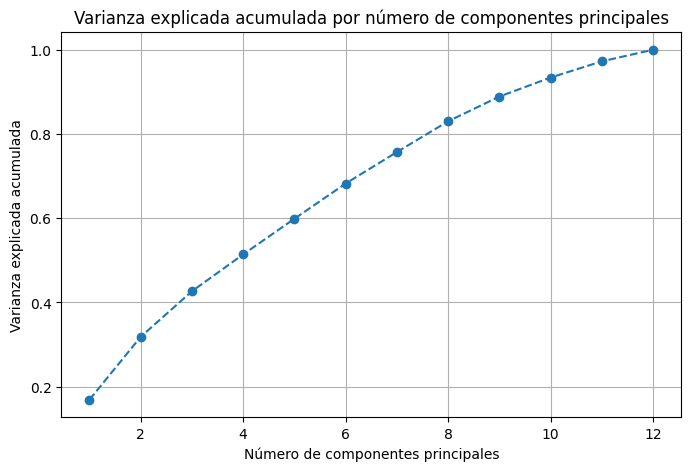

In [114]:
#Calcular la varianza explicada acumulada

data_2=high_ipsa
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [49]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
bd_amarillos.dtypes

Unnamed: 0                   int64
Período                      int64
Hacienda                     int64
Zona                         int64
Tenencia                   float64
Suerte                       int64
Suelo                        int64
Area Neta                  float64
Dist Km                    float64
Variedad                     int64
Cod.Estado #                 int64
Cod.Estado                   int64
Edad Ult Cos               float64
Destino 1=Semilla            int64
Cod. T.Cultivo             float64
Producto                     int64
Dosis Madurante            float64
TonUltCorte                float64
TCH                        float64
TCHM                       float64
Ton.Azucar                 float64
Rdto                       float64
TAH                        float64
TAHM                       float64
Sac.Caña Precosecha        float64
%Sac.Caña                  float64
%Sac.Muestreadora          float64
%ATR                       float64
KATRHM              

In [98]:
bd_amarillos_clean = bd_amarillos.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora"])
tch_amarillos = bd_amarillos["TCH"]


In [99]:
bd_amarillos_clean.dtypes

Hacienda                     int64
Zona                         int64
Tenencia                   float64
Suerte                       int64
Suelo                        int64
Area Neta                  float64
Dist Km                    float64
Variedad                     int64
Cod.Estado #                 int64
Cod.Estado                   int64
Edad Ult Cos               float64
Destino 1=Semilla            int64
Cod. T.Cultivo             float64
Producto                     int64
Dosis Madurante            float64
TonUltCorte                float64
Ton.Azucar                 float64
Sac.Caña Precosecha        float64
%Fibra Caña                float64
%AR Jugo                   float64
%ME Min                    float64
%ME Veg                    float64
%ME Tot                    float64
Brix                       float64
Pureza                     float64
Vejez                      float64
Tipo Quema                   int64
T.Corte                      int64
Cerca de            

In [100]:
tch_amarillos

0       0.452304
1       0.553564
2       0.516871
3       0.474754
4       0.564334
5       0.317536
6       0.350411
7       0.506090
8       0.421630
9       0.509059
10      0.366699
11      0.581954
12      0.485819
13      0.494897
14      0.501205
15      0.504033
16      0.580555
17      0.567345
18      0.577028
19      0.461810
20      0.558634
21      0.360363
22      0.332874
23      0.453571
24      0.359093
25      0.432293
26      0.561285
27      0.356788
28      0.457137
29      0.573470
30      0.517729
31      0.630221
32      0.450796
33      0.415789
34      0.407760
35      0.641845
36      0.413455
37      0.568116
38      0.258159
39      0.490383
40      0.539682
41      0.478166
42      0.397290
43      0.495795
44      0.543646
45      0.600636
46      0.474691
47      0.490459
48      0.578426
49      0.407427
50      0.368511
51      0.522968
52      0.431946
53      0.491308
54      0.548387
55      0.472712
56      0.507303
57      0.594958
58      0.5703

In [159]:
def rangesAmaillos(x):
    if x<0.379470:
        return 0
    elif x>0.495002:
        return 2
    else:
        return 1

vecRanges = np.vectorize(rangesAmaillos)

tch_amarillos_rangos = vecRanges(tch_amarillos.to_numpy())

In [164]:
X_train, X_test, y_train, y_test = train_test_split(bd_amarillos_clean, tch_amarillos_rangos, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred, average="weighted")
print("Precisión en el conjunto de prueba:", accuracy)
print(recall)

Precisión en el conjunto de prueba: 0.7903614457831325
0.7903614457831325


In [154]:
sac_amarillos = bd_amarillos["%Sac.Caña"]
sac_amarillos.describe()

count    2766.000000
mean        0.690668
std         0.061340
min         0.529295
25%         0.647646
50%         0.692833
75%         0.734799
max         0.866439
Name: %Sac.Caña, dtype: float64

In [167]:
def sacRangesAmaillos(x):
    if x<0.647646:
        return 0
    elif x>0.734799:
        return 2
    else:
        return 1

vecRanges = np.vectorize(sacRangesAmaillos)

sac_amarillos_rangos = vecRanges(sac_amarillos.to_numpy())

In [168]:
X_train, X_test, y_train, y_test = train_test_split(bd_amarillos_clean, sac_amarillos_rangos, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred, average="weighted")
print("Precisión en el conjunto de prueba:", accuracy)
print(recall)

Precisión en el conjunto de prueba: 0.9409638554216867
0.9409638554216867


Varianza explicada por cada componente principal:
Componente 1: 0.1523
Componente 2: 0.0963
Componente 3: 0.0695
Componente 4: 0.0588
Componente 5: 0.0509
Componente 6: 0.0407
Componente 7: 0.0383
Componente 8: 0.0373
Componente 9: 0.0359
Componente 10: 0.0308
Componente 11: 0.0291
Componente 12: 0.0237
Componente 13: 0.0210
Componente 14: 0.0205
Componente 15: 0.0179
Componente 16: 0.0169
Componente 17: 0.0167
Componente 18: 0.0162
Componente 19: 0.0158
Componente 20: 0.0147
Componente 21: 0.0131
Componente 22: 0.0127
Componente 23: 0.0125
Componente 24: 0.0115
Componente 25: 0.0114
Componente 26: 0.0108
Componente 27: 0.0107
Componente 28: 0.0096
Componente 29: 0.0092
Componente 30: 0.0085
Componente 31: 0.0080
Componente 32: 0.0076
Componente 33: 0.0065
Componente 34: 0.0060
Componente 35: 0.0058
Componente 36: 0.0057
Componente 37: 0.0051
Componente 38: 0.0048
Componente 39: 0.0045
Componente 40: 0.0040
Componente 41: 0.0034
Componente 42: 0.0032
Componente 43: 0.0029
Componente 44

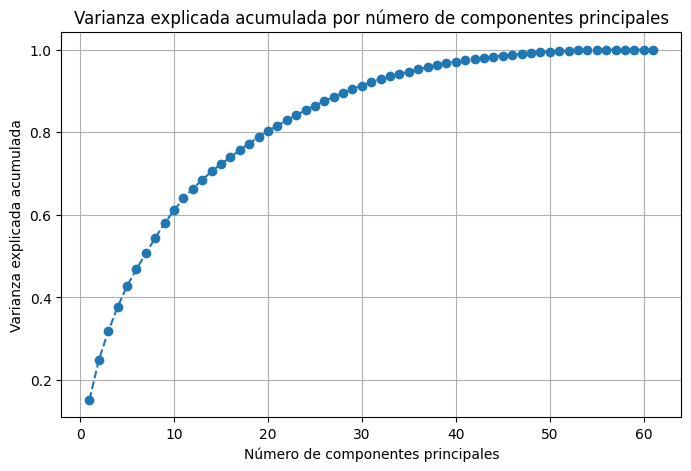

In [115]:
#Calcular la varianza explicada acumulada

data_2=bd_amarillos_clean
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [106]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
bd_azules.dtypes

Unnamed: 0                  int64
Período                     int64
Hacienda                    int64
Zona                        int64
Tenencia                  float64
Suerte                      int64
Suelo                       int64
Area Neta                 float64
Dist Km                   float64
Variedad                    int64
Cod.Estado #                int64
Cod.Estado                  int64
Edad Ult Cos              float64
Destino 1=Semilla           int64
Cod. T.Cultivo            float64
Producto                    int64
Dosis Madurante           float64
TonUltCorte               float64
TCH                       float64
TCHM                      float64
Ton.Azucar                float64
Rdto                      float64
TAH                       float64
TAHM                      float64
Sac.Caña Precosecha       float64
Edad.Precosecha           float64
%Sac.Caña                 float64
%Sac.Muestreadora         float64
%ATR                      float64
KATRHM        

In [172]:
bd_azules_clean = bd_azules.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora"])
tch_azules = bd_azules["TCH"]
sac_azules = bd_azules["%Sac.Caña"]

In [108]:
tch_azules.describe()

count    15567.000000
mean         0.426054
std          0.094800
min          0.157828
25%          0.362853
50%          0.425964
75%          0.490172
max          0.696767
Name: TCH, dtype: float64

In [109]:
def rangesAzules(x):
    if x<0.362853:
        return 0
    elif x>0.490172:
        return 2
    else:
        return 1

vecRanges = np.vectorize(rangesAzules)

tch_azules_rangos = vecRanges(tch_azules.to_numpy())

In [176]:
sac_azules.describe()

count    15567.000000
mean         0.675028
std          0.055129
min          0.517391
25%          0.637957
50%          0.676549
75%          0.713679
max          0.828804
Name: %Sac.Caña, dtype: float64

In [177]:
def sac_rangesAzules(x):
    if x<0.637957:
        return 0
    elif x>0.713679:
        return 2
    else:
        return 1

vecRanges = np.vectorize(sac_rangesAzules)

sac_azules_rangos = vecRanges(sac_azules.to_numpy())

In [110]:
X_train, X_test, y_train, y_test = train_test_split(bd_azules_clean, tch_azules_rangos, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9347034896167844


In [178]:
X_train, X_test, y_train, y_test = train_test_split(bd_azules_clean, sac_azules_rangos, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9458360094198245


Varianza explicada por cada componente principal:
Componente 1: 0.1500
Componente 2: 0.0867
Componente 3: 0.0670
Componente 4: 0.0535
Componente 5: 0.0478
Componente 6: 0.0456
Componente 7: 0.0383
Componente 8: 0.0361
Componente 9: 0.0338
Componente 10: 0.0308
Componente 11: 0.0259
Componente 12: 0.0253
Componente 13: 0.0230
Componente 14: 0.0227
Componente 15: 0.0221
Componente 16: 0.0218
Componente 17: 0.0211
Componente 18: 0.0189
Componente 19: 0.0186
Componente 20: 0.0174
Componente 21: 0.0167
Componente 22: 0.0163
Componente 23: 0.0155
Componente 24: 0.0148
Componente 25: 0.0145
Componente 26: 0.0133
Componente 27: 0.0118
Componente 28: 0.0113
Componente 29: 0.0108
Componente 30: 0.0091
Componente 31: 0.0088
Componente 32: 0.0084
Componente 33: 0.0075
Componente 34: 0.0070
Componente 35: 0.0061
Componente 36: 0.0059
Componente 37: 0.0051
Componente 38: 0.0045
Componente 39: 0.0030
Componente 40: 0.0017
Componente 41: 0.0014


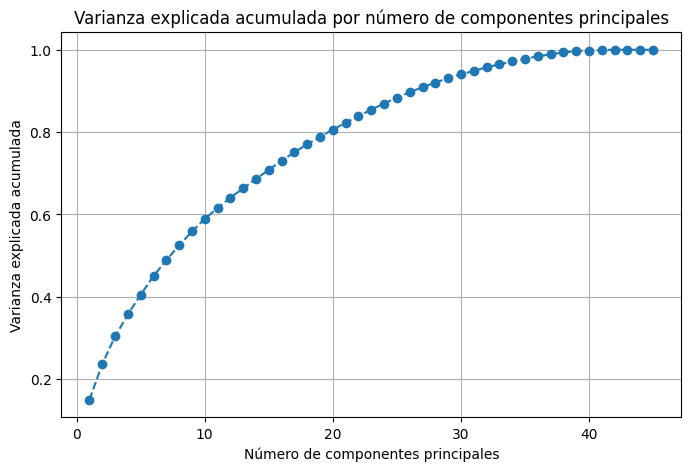

In [117]:
#Calcular la varianza explicada acumulada

data_2=bd_azules_clean
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()